In [41]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as ss
import statsmodels.api as sm

In [2]:
import warnings
warnings.filterwarnings("ignore")

In [33]:
from sklearn.feature_selection import VarianceThreshold, f_regression
from sklearn.linear_model import LinearRegression

In [4]:
import sklearn

In [5]:
import collections

In [6]:
%matplotlib inline

In [7]:
# Import data
data = pd.read_csv("train.csv")

# 1. Data Overview (tu trzeba będzie dodać jeszcze jakiś opis co tak naprawdę chcemy zrobić, skąd wzięliśmy dataset itd.) 

At first we have a brief look at the initial form of our data, so to get sense how we should prepare our data to make it suitable for the modelling


In [8]:
data.head(20)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
5,6,50,RL,85.0,14115,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,MnPrv,Shed,700,10,2009,WD,Normal,143000
6,7,20,RL,75.0,10084,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,307000
7,8,60,RL,NaN,10382,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,Shed,350,11,2009,WD,Normal,200000
8,9,50,RM,51.0,6120,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2008,WD,Abnorml,129900
9,10,190,RL,50.0,7420,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,1,2008,WD,Normal,118000


Number of rows is:

In [9]:
data.shape[0]

1460

Types of variables in dataset, it is really long so we will only show the number of variables in specific group:

In [10]:
data.dtypes.value_counts()

object     43
int64      35
float64     3
dtype: int64

Now we know that our data has 81 columns and 1460 rows. The number of columns is definetely too big for the purpose of this analysis. So our first task will be to select the limited number of features which will suit our model in the best way.

# 2. Data preparation

## 2.1. Dependent variable SalePrice overview

Our dependent variable is SalePrice, which is the price the house were sold. Here are some basic information about it 

In [11]:
data.SalePrice.describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

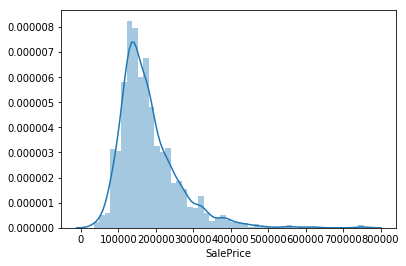

In [12]:
sns.distplot(data["SalePrice"])

In [13]:
print("The skewness is:",data.SalePrice.skew())
print("The kurtosis is:",data.SalePrice.kurt())

The skewness is: 1.8828757597682129
The kurtosis is: 6.536281860064529


So we can see that our dependent variable does not have a perfect normal distribution. We can try improving it by log normalization 


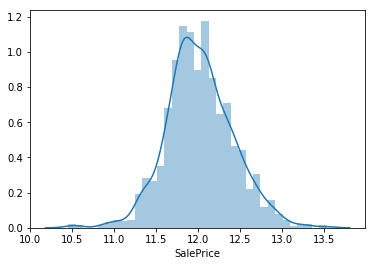

In [14]:
sns.distplot(np.log1p(data.SalePrice))

We can see that actually the log normalized distribution of dependent variable seems to be closer to the normal distribution. We will not modify SalesPrice variable now. But just in case we will save the log normalized one in memory

In [15]:
log1SalePrice = np.log1p(data.SalePrice)

## 2.2. Clearing the dataset of redundant variables and missings

### 2.2.1. Dropping redundant variables (numerical)

Having in mind that we have 81 variables in our data frame it would be useful to remove some of them to simplify the analysis. First we can get rid of Id variable which is surely not going to bring us anything important. 

In [16]:
data = data.drop(columns = "Id")

In [17]:
data.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


Now we can take a look at the correlation matrix for continous variables.

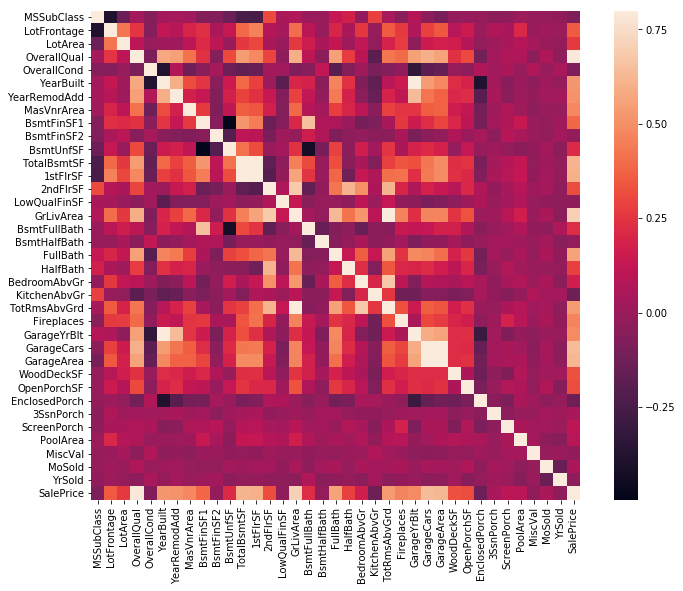

In [18]:
corrmat = data.corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, vmax=.8, square=True);

There is a high correlation between variables GarageArea/GarageCars and 1stFlrSF/TotalBsmtSF. 
1. First let's take a look at Garage variables. It is pretty obvious GarageCars which is "Size of garage in car capacity" is correlated with the area of garage. Therefore there is no need to keep both variables 
2. The second relations is between the total sq feet of First floor and total sq feet of basement. It's again pretty self explanatory that those variables are correlated. 
3. We decide to remove the variable GarageCars and TotalBsmtSF
There is also a high correlation between YearBuilt and GarageYrBlt - most of the garages were built at the same time as the original construction. Therefore, we will dispose "GarageYrBlt".

In [19]:
data = data.drop(columns = ["GarageCars", "TotalBsmtSF", "GarageYrBlt"])

### 2.2.2. Dealing with NAs

Now we will look for association between categorical data. In order to do that, firstly we will put "NA" value into such columns for which NaN value does not mean missing data, eg. for "Pool quality" NaN means there is no pool and not missing data.

In [20]:
na_cols = ["Alley", "BsmtQual", "BsmtCond", "BsmtExposure", "BsmtFinType1", "BsmtFinType2", "FireplaceQu", "GarageType", "GarageFinish", "GarageQual", "GarageCond", "PoolQC", "Fence", "MiscFeature"]
for nas in na_cols:
    if "Bsmt" in nas:
        data[nas] = data[nas].fillna("No basement")
    elif "Garage" in nas:
        data[nas] = data[nas].fillna("No garage")
    else:
        data[nas] = data[nas].fillna("No {}".format(nas))

categorical_df = data.select_dtypes(include='object')
col_names = categorical_df.columns.values.tolist()

Now we can assess if there are some other NA values in dataset which are now surely just missings

In [21]:
na_percantage = dict((data.isna().sum()/data.shape[0])*100)
na_percantage 
na_percentage_sorted = sorted(na_percantage.items(), key=lambda kv: kv[1], reverse=True)
na_percentage_sorted = collections.OrderedDict(na_percentage_sorted)
na_percentage_sorted

OrderedDict([('LotFrontage', 17.73972602739726),
             ('MasVnrType', 0.547945205479452),
             ('MasVnrArea', 0.547945205479452),
             ('Electrical', 0.0684931506849315),
             ('MSSubClass', 0.0),
             ('MSZoning', 0.0),
             ('LotArea', 0.0),
             ('Street', 0.0),
             ('Alley', 0.0),
             ('LotShape', 0.0),
             ('LandContour', 0.0),
             ('Utilities', 0.0),
             ('LotConfig', 0.0),
             ('LandSlope', 0.0),
             ('Neighborhood', 0.0),
             ('Condition1', 0.0),
             ('Condition2', 0.0),
             ('BldgType', 0.0),
             ('HouseStyle', 0.0),
             ('OverallQual', 0.0),
             ('OverallCond', 0.0),
             ('YearBuilt', 0.0),
             ('YearRemodAdd', 0.0),
             ('RoofStyle', 0.0),
             ('RoofMatl', 0.0),
             ('Exterior1st', 0.0),
             ('Exterior2nd', 0.0),
             ('ExterQual', 0.0),
       

As we can see now there are few variables which contain NA values. It's mostly the problem in case of variable LotFrontage which has 17% of missings. It's not really important variable so we will just drop it. For the other 3 variables we will drop rows with missing values

In [22]:
data = data.drop(columns='LotFrontage')
data = data.dropna()

### 2.2.3. Dropping redundant variables (categorogical)

After that, we can calculate Cramer's V matrix, which contains measure of association between categorical features. Cramer's V is similar to correlation as the output is in the range of [0,1], where 0 indicates no association and 1 full association. Naturally, Cramer's V matrix is symmetrical.

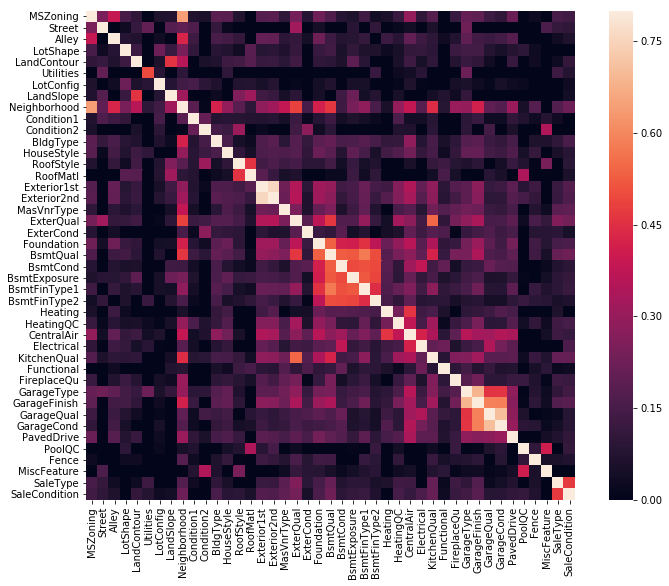

In [23]:
# source for cramers_v function in python:
# https://towardsdatascience.com/the-search-for-categorical-correlation-a1cf7f1888c9

def cramers_v(x, y):
    confusion_matrix = pd.crosstab(x,y)
    chi2 = ss.chi2_contingency(confusion_matrix)[0]
    n = confusion_matrix.sum().sum()
    phi2 = chi2/n
    r,k = confusion_matrix.shape
    phi2corr = max(0, phi2-((k-1)*(r-1))/(n-1))
    rcorr = r-((r-1)**2)/(n-1)
    kcorr = k-((k-1)**2)/(n-1)
    return np.sqrt(phi2corr/min((kcorr-1),(rcorr-1)))

corrmat = pd.DataFrame(0, index=col_names, columns=col_names).astype('float64')

for i, column_i in enumerate(categorical_df):
    for j, column_j in enumerate(categorical_df):
        corrmat.iloc[i][column_j] = cramers_v(categorical_df[column_i], categorical_df[column_j])

f, ax = plt.subplots(figsize=(12, 9))    
sns.heatmap(corrmat, vmax=.8, square=True);

Again, we can extract a few variables that seem to be strongly associated. 
1. Exterior1st and Exterior2nd - both variables concern one feature, so we decided to leave just one in our analysis.
2. GarageQual and GarageCond - rather unsurprisingly, garage quality corresponds with garage condition. Therefore we decided to omit GarageCond.
3. GarageType and GarageFinish - interior finish of the garage seems to be correlated with garage location. Thus, we will only usue GarageType.

In [24]:
data = data.drop(columns = ["Exterior2nd", "GarageCond", "GarageFinish"])

## 2.3. One hot encoding


We have already dealt with some issues which were present in our dataset, removing NAs and some highly correlated variables. The next step is to introduce a proper approach to work with categorogical variables which are higly represented in our case. We decided to use One Hot Encoding to solve this

In [25]:
nominal_variables = []
num_variables = []
for i in data.columns:
    if str(data[i].dtypes) == "object":
        nominal_variables.append(i)
        print(i,":", data[i].unique(), ";" ,len(data[i].unique()))
    else:
        num_variables.append(i)
data = pd.concat([data[num_variables], pd.get_dummies(data[nominal_variables])], axis=1)

MSZoning : ['RL' 'RM' 'C (all)' 'FV' 'RH'] ; 5
Street : ['Pave' 'Grvl'] ; 2
Alley : ['No Alley' 'Grvl' 'Pave'] ; 3
LotShape : ['Reg' 'IR1' 'IR2' 'IR3'] ; 4
LandContour : ['Lvl' 'Bnk' 'Low' 'HLS'] ; 4
Utilities : ['AllPub' 'NoSeWa'] ; 2
LotConfig : ['Inside' 'FR2' 'Corner' 'CulDSac' 'FR3'] ; 5
LandSlope : ['Gtl' 'Mod' 'Sev'] ; 3
Neighborhood : ['CollgCr' 'Veenker' 'Crawfor' 'NoRidge' 'Mitchel' 'Somerst' 'NWAmes'
 'OldTown' 'BrkSide' 'Sawyer' 'NridgHt' 'NAmes' 'SawyerW' 'IDOTRR'
 'MeadowV' 'Edwards' 'Timber' 'Gilbert' 'StoneBr' 'ClearCr' 'NPkVill'
 'Blmngtn' 'BrDale' 'SWISU' 'Blueste'] ; 25
Condition1 : ['Norm' 'Feedr' 'PosN' 'Artery' 'RRAe' 'RRNn' 'RRAn' 'PosA' 'RRNe'] ; 9
Condition2 : ['Norm' 'Artery' 'RRNn' 'Feedr' 'PosN' 'PosA' 'RRAn' 'RRAe'] ; 8
BldgType : ['1Fam' '2fmCon' 'Duplex' 'TwnhsE' 'Twnhs'] ; 5
HouseStyle : ['2Story' '1Story' '1.5Fin' '1.5Unf' 'SFoyer' 'SLvl' '2.5Unf' '2.5Fin'] ; 8
RoofStyle : ['Gable' 'Hip' 'Gambrel' 'Mansard' 'Flat' 'Shed'] ; 6
RoofMatl : ['CompShg' 'WdSh

# 3. Feature Selection

In [26]:
# Od szczegółu do ogółu
sklearn.feature_selection.f_regression(X, y, center=True)

In [27]:
X = data.loc[:, data.columns != 'SalePrice'] 
y = data.SalePrice

In [37]:
result = f_regression(X,y, center = True)

In [52]:
features = X.columns.values
newFeatures = []
tempFeatures = []

for k in range(1):
    p_values = []
    featToTest = list(set(features) - set(newFeatures))
    for feat in featToTest:
        tempFeatures = newFeatures.copy()
        tempFeatures.append(feat)
        X2 = sm.add_constant(X[tempFeatures])
        est = sm.OLS(y, X2)
        results = est.fit()
        print(feat, ": ", results.f_pvalue)
        

Condition1_PosA :  0.10564163438355754
Neighborhood_StoneBr :  6.576099050691313e-17
PavedDrive_Y :  3.475347794134116e-19
EnclosedPorch :  8.499297492455897e-07
Fence_No Fence :  5.1040451410862026e-11
RoofMatl_WdShngl :  6.489516155388506e-11
FireplaceQu_Ex :  2.605484372999365e-23
ExterCond_Ex :  0.6509039771225564
BsmtFinType2_Unf :  7.877661302021767e-06
BldgType_TwnhsE :  0.8696357593825006
Foundation_Slab :  4.7149017315619115e-06
BsmtFullBath :  4.1607266038034924e-18
SaleType_ConLw :  0.2971959935961741
KitchenQual_Fa :  1.684518532957523e-09
Neighborhood_Blueste :  0.4418005534270546
Functional_Min2 :  0.006752615540051051
BsmtFinType1_LwQ :  0.0013395165071421432
BsmtExposure_Mn :  0.08798820545685976
Condition1_RRNe :  0.8566918655222261
HouseStyle_SFoyer :  0.0003931587377715101
Heating_Grav :  0.0004176278149933198
FireplaceQu_Po :  0.003846825634489195
Condition2_Artery :  0.18605745364654014
Heating_OthW :  0.32768388361062784
RoofStyle_Mansard :  0.9985153551960466
Ext

FireplaceQu_TA :  2.4195919583087283e-10
BedroomAbvGr :  4.2907409370538884e-11
BsmtCond_Fa :  3.90882629046425e-07
GarageQual_Fa :  3.6156530753826704e-07
Electrical_FuseP :  0.06861888052966962
BsmtQual_Fa :  8.615145686870613e-07
Functional_Maj2 :  0.0073632588744801985
SaleType_ConLD :  0.11239268708346357
Condition2_PosN :  0.0628392417683091
Fence_GdPrv :  0.8668388538801572
ExterCond_Po :  0.18918180463544676
BsmtExposure_No :  2.2356731962448682e-24
Neighborhood_NAmes :  5.35205232575693e-13
SaleCondition_Family :  0.07814442846663279
SaleType_Con :  0.11240135216286952
Condition2_Feedr :  0.06573514314182895
LotShape_IR2 :  1.1360802378231144e-06
Exterior1st_Wd Sdng :  1.198319249442582e-09
PoolQC_Ex :  2.910234806444965e-08
LandSlope_Mod :  0.09383093232781188
BsmtFinType2_ALQ :  0.1048390685009194
LotConfig_FR3 :  0.4820698578279029
Heating_GasA :  0.0004240170409740417
ScreenPorch :  1.594864522012552e-05
MSZoning_RL :  1.6913078563306516e-21
FireplaceQu_Fa :  0.32906765743

In [46]:
featToTest = list(set(features) - set(newFeatures))
print(featToTest)

['Condition1_PosA', 'Neighborhood_StoneBr', 'PavedDrive_Y', 'EnclosedPorch', 'Fence_No Fence', 'RoofMatl_WdShngl', 'FireplaceQu_Ex', 'ExterCond_Ex', 'BsmtFinType2_Unf', 'BldgType_TwnhsE', 'Foundation_Slab', 'BsmtFullBath', 'SaleType_ConLw', 'KitchenQual_Fa', 'Neighborhood_Blueste', 'Functional_Min2', 'BsmtFinType1_LwQ', 'BsmtExposure_Mn', 'Condition1_RRNe', 'HouseStyle_SFoyer', 'Heating_Grav', 'FireplaceQu_Po', 'Condition2_Artery', 'Heating_OthW', 'RoofStyle_Mansard', 'Exterior1st_CBlock', 'BsmtFinType2_BLQ', 'Exterior1st_BrkFace', 'Foundation_BrkTil', 'Condition1_Artery', 'MSZoning_RH', '1stFlrSF', 'HouseStyle_1Story', 'HeatingQC_TA', 'SaleCondition_Alloca', 'HeatingQC_Gd', 'Alley_No Alley', 'LandContour_Bnk', 'BsmtFinType1_Unf', 'Fence_MnWw', 'LotShape_IR3', 'MasVnrType_BrkCmn', 'Condition2_PosA', 'MSSubClass', 'GarageQual_No garage', 'MiscFeature_Gar2', 'HouseStyle_1.5Fin', 'BsmtQual_Ex', 'MSZoning_RM', 'RoofStyle_Gambrel', 'Heating_Wall', 'Functional_Sev', 'Neighborhood_Timber', 'C

### 2.2.3 Limiting Number of variables to those mostly correlated with dependent variable

After recoding nominal variables to dummy our dataset got really big. It has now 263 columns. Therefore there is a serious need to cut down the number of variables. First we will filter our variables to find those which are mostly correlated with dependent variable. We will consider only those variables which correltion (in absolute terms) is greater than 0.4

In [28]:
### Jest tylko pytanie, czy takie podejście jest akceptowalne. Wcześniej zrobiłem ten hot encoding 
### czyli binaryzację zmiennych nominalnych i jest pytanie, czy stosując takie odcięcie jak 40% 
### to nie będzie to jakimś wypaczeniem. Jest wtedy ryzyko, że część zmiennych zbinaryzowanych, które kiedyś były
### jedną zmienną znajdzie się w uszczuplonym datasecie, a część zostanie wyrzucona. Do przegadania!!!

In [29]:
# corr_1 = data.corr()


# most_correlated_with_SalePrice = corr_1.SalePrice.to_dict()
# most_correlated_with_SalePrice_fin = {}

# for k, v in most_correlated_with_SalePrice.items():
#     if abs(v) > 0.4:
#         most_correlated_with_SalePrice_fin[k] = abs(v)
    
        
# most_correlated_with_SalePrice_fin = sorted(most_correlated_with_SalePrice_fin.items(), key=lambda kv: kv[1], reverse=True)

# most_correlated_names = []

# for x in most_correlated_with_SalePrice_fin:
#     most_correlated_names.append(x[0])

# most_correlated_with_SalePrice_fin

Now we can see the most correlated variables with SalePrice in terms of absolute values. We can limit our dataset to those variables. We are left with 23 independent variables

In [30]:
# data = data[most_correlated_names]

In [31]:
# data.head()

Now we verify if the remaining variables are not constant

In [32]:
# constant_filter = VarianceThreshold(threshold=0)
# constant_filter.fit(data)
# len(data.columns[constant_filter.get_support()])  

All the variables left are not constant

# Rzeczy do zrobienia

1. Zrobiłem właściwie całe feature selection i teraz jest pytanie co dalej. W sensie z tego co przeczytałem, to dzielenie datasetu, w którym zostało już zrobione feature selection na testowy i trainingowy nie jest dobrym podejściem. No i w ogóle jest pytanie, na którym etapie ten feature selection powinien wystąpić, żeby zredukować ryzyko jakichś przekłamań. Znasz na to odpowiedź? Znalazłem kilka odpowiedzi, które przejrzałem raczej pobieżnie na razie, ale wskazują one, że ten feature selection powinien znaleźć się jakoś w pętli (jest coś takiego jak K-Fold cross validation) wspomniane tutaj: https://stats.stackexchange.com/questions/64825/should-feature-selection-be-performed-only-on-training-data-or-all-data

https://stats.stackexchange.com/questions/250803/feature-selection-on-training-and-test-data

https://stats.stackexchange.com/questions/390036/feature-selection-on-training-set-without-cross-validation

https://machinelearningmastery.com/an-introduction-to-feature-selection/

2. Teraz jest pytanie, czy ty jakoś czaisz bazę na ten temat

KK 21.05.2019
Zrobione: przejrzałam całość, dodałam jeszcze association dla danych typu categorical bo tutaj też są niepotrzebne zmienne, usunęłam rok zbudowania garażu.
Feature selection rzeczywiście trzeba będzie zrobić za pomocą nested cross-validation, ale to już jutro.